**MOVIE GENRE CLASSIFICATION  **



NAIVE BAYES APPROACH

In [16]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [17]:
#TRAINING DATA
train_data=pd.read_csv("train_data.txt",sep=":::" ,names = ['movie' , 'genre' , 'description'] , engine='python',on_bad_lines='skip')
print("train_data.head()")
train_data.head()
test_data=pd.read_csv("test_data.txt",sep=":::" ,names = ['movie' , 'genre' , 'description'] , engine='python',on_bad_lines='skip')
test_data


train_data.head()


,movie,genre,description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


In [18]:
#GETTING  INFORMATION
print("training data shape")
print(train_data.shape)
print("\n")
print("testing data shape")
print(test_data.shape)
print("\n")
print("dataset information")
train_data.info()
print("\n")
print("dataset statical information")
train_data.describe()


training data shape
(54214, 3)


testing data shape
(54200, 3)


dataset information
<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movie        54214 non-null  object
 1   genre        54214 non-null  object
 2   description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


dataset statical information


,movie,genre,description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [19]:
train_data.isnull().sum()

movie          0
genre          0
description    0
dtype: int64

In [20]:
#Box Plots: Unveil statistical summaries such as median, quartiles, and outliers, aiding in data distribution analysis.
#Scatter Plots: Showcase relationships between two variables, identifying patterns and outliers through scattered data points.
#Bar Charts: Ideal for comparing categorical data or displaying frequencies, bar charts offer a clear visual representation of values.

C:\Users\HP\AppData\Local\Temp\ipykernel_16080\464692486.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar.set_xticklabels(bar.get_xticklabels(), rotation=90)


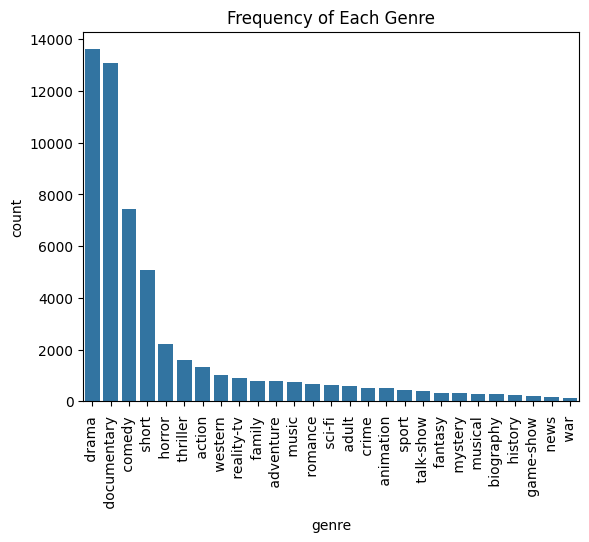

In [21]:
# Create a bar plot
genre_counts = train_data['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']
bar = sns.barplot(x='genre', y='count', data=genre_counts)
bar.set_xticklabels(bar.get_xticklabels(), rotation=90)
plt.title("Frequency of Each Genre")

plt.show()

In [22]:
#text preprocessing
#lower case
def lower_case(text):
  return text.lower()
  train_data=lower_case(train_data)
  test_data=lower_case(test_data)

In [23]:

#remove all punctuations in the data
import string
string.punctuation
def remove_punctuations(text):
  punctuation=string.punctuation
  for char in punctuation:
    text=text.replace(char,'')

  return text
train_data=train_data.apply(lambda x:remove_punctuations(x))
test_data=test_data.apply(lambda x:remove_punctuations(x))





In [24]:
x_train=train_data['description']
y_train=train_data['genre']
x_test=test_data['description']
y_test=test_data['genre']



In [25]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=0)

Validation Accuracy: 0.5199508146326468
Validation Accuracy: 52.00%


c:\Users\HP\AppData\Local\Programs\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu


Classification Report:
                precision    recall  f1-score   support

      action        0.53      0.06      0.11       376
       adult        0.62      0.05      0.09       172
   adventure        0.72      0.05      0.10       245
   animation        0.00      0.00      0.00       151
   biography        0.00      0.00      0.00        80
      comedy        0.53      0.44      0.48      2225
       crime        0.00      0.00      0.00       142
 documentary        0.56      0.88      0.69      3883
       drama        0.46      0.83      0.59      4140
      family        0.00      0.00      0.00       248
     fantasy        0.00      0.00      0.00       101
   game-show        1.00      0.25      0.40        48
     history        0.00      0.00      0.00        69
      horror        0.72      0.33      0.45       658
       music        0.86      0.08      0.15       226
     musical        0.00      0.00      0.00        83
     mystery        0.00      0.00     

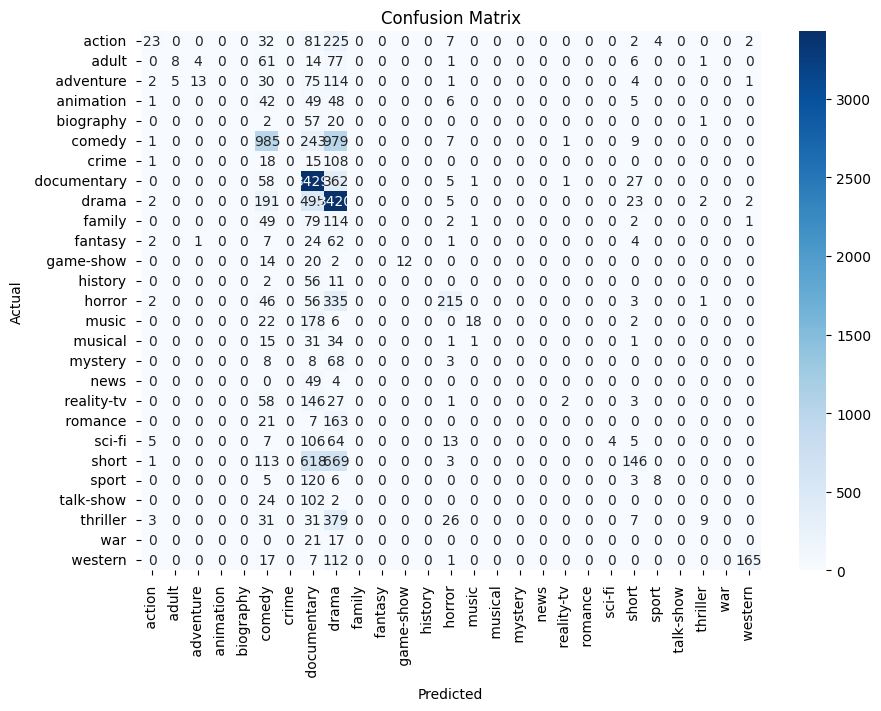

In [26]:
# Vectorizing Data
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
x_train_vec = tfidf.fit_transform(X_train)
x_test_vec = tfidf.transform(x_test)
x_val_vec = tfidf.transform(X_val)

# Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train_vec, Y_train)

# Predicting and Evaluating
y_pred = nb.predict(x_val_vec)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Printing Accuracy
accuracy = accuracy_score(Y_val, y_pred)
print("Validation Accuracy:", accuracy)
accuracy_percentage = accuracy * 100
print(f"Validation Accuracy: {accuracy_percentage:.2f}%")
print("\nClassification Report:\n", classification_report(Y_val, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_val, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y_val), yticklabels=np.unique(Y_val))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [27]:
while True:
    user_input = input("\nEnter a movie description (or 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    user_input_vec = tfidf.transform([user_input])
    prediction = nb.predict(user_input_vec)
    print(f"Predicted Genre: {prediction[0]}")

Predicted Genre:  drama 


**BY LOGISTIC REGRESSION **

train_data.head()
training data shape
(54214, 3)


testing data shape
(54200, 3)


dataset information
<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movie        54214 non-null  object
 1   genre        54214 non-null  object
 2   description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


dataset statistical information


C:\Users\HP\AppData\Local\Temp\ipykernel_16080\1461330638.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar.set_xticklabels(bar.get_xticklabels(), rotation=90)


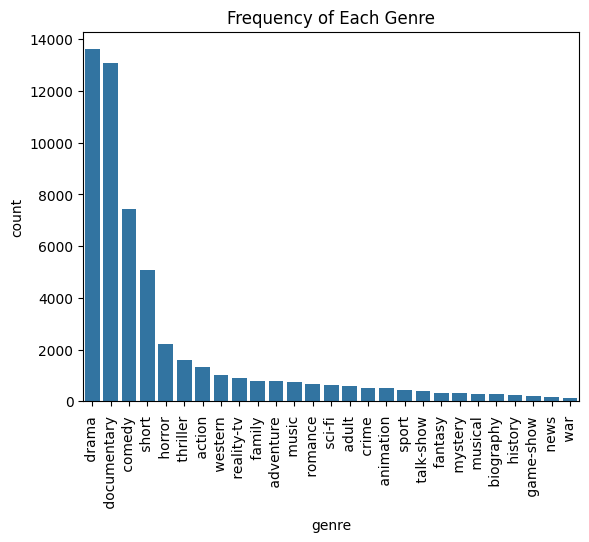

Validation Accuracy: 0.5871991146361708
Validation Accuracy: 58.72%


c:\Users\HP\AppData\Local\Programs\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu


Classification Report:
                precision    recall  f1-score   support

      action        0.40      0.22      0.29       248
       adult        0.71      0.27      0.39       110
   adventure        0.56      0.15      0.23       150
   animation        0.30      0.03      0.05       107
   biography        0.00      0.00      0.00        52
      comedy        0.53      0.59      0.56      1497
       crime        0.15      0.02      0.04        90
 documentary        0.67      0.85      0.75      2586
       drama        0.55      0.78      0.65      2773
      family        0.52      0.09      0.16       164
     fantasy        0.00      0.00      0.00        67
   game-show        0.89      0.52      0.65        33
     history        0.00      0.00      0.00        47
      horror        0.66      0.59      0.62       424
       music        0.70      0.42      0.53       163
     musical        0.67      0.04      0.07        56
     mystery        0.00      0.00     

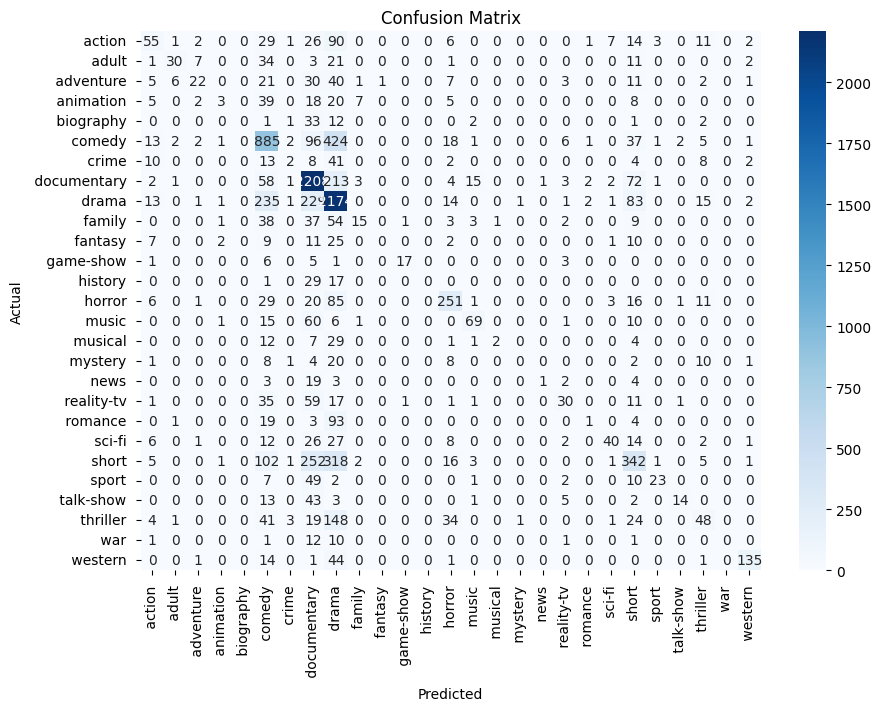

Predicted Genre:  drama 


In [28]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# TRAINING DATA
train_data = pd.read_csv("train_data.txt", sep=":::", names=['movie', 'genre', 'description'], engine='python', on_bad_lines='skip')
print("train_data.head()")
train_data.head()
test_data = pd.read_csv("test_data.txt", sep=":::", names=['movie', 'genre', 'description'], engine='python', on_bad_lines='skip')
test_data

# GETTING INFORMATION
print("training data shape")
print(train_data.shape)
print("\n")
print("testing data shape")
print(test_data.shape)
print("\n")
print("dataset information")
train_data.info()
print("\n")
print("dataset statistical information")
train_data.describe()

train_data.isnull().sum()

# Create a bar plot
genre_counts = train_data['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']
bar = sns.barplot(x='genre', y='count', data=genre_counts)
bar.set_xticklabels(bar.get_xticklabels(), rotation=90)
plt.title("Frequency of Each Genre")
plt.show()

x_train = train_data['description']
y_train = train_data['genre']
x_test = test_data['description']
y_test = test_data['genre']

X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

# Vectorizing Data
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
x_train_vec = tfidf.fit_transform(X_train)
x_test_vec = tfidf.transform(x_test)
x_val_vec = tfidf.transform(X_val)

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train_vec, Y_train)

# Predicting and Evaluating
y_pred = log_reg.predict(x_val_vec)

# Printing Accuracy
accuracy = accuracy_score(Y_val, y_pred)
print("Validation Accuracy:", accuracy)
accuracy_percentage = accuracy * 100
print(f"Validation Accuracy: {accuracy_percentage:.2f}%")
print("\nClassification Report:\n", classification_report(Y_val, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_val, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y_val), yticklabels=np.unique(Y_val))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

while True:
    user_input = input("\nEnter a movie description (or 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    user_input_vec = tfidf.transform([user_input])
    prediction = log_reg.predict(user_input_vec)
    print(f"Predicted Genre: {prediction[0]}")
